In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [25]:
# Pull in average happiness data
happiness_file = "../Happiness/Resources/avg_happiness.csv"
happiness_df = pd.read_csv(happiness_file, encoding = "UTF-8")
happiness_df.head()

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness
0,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114
1,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110
2,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460
3,Norway,7.522,7.498,7.537,7.594,7.554,7.5410
4,Canada,7.427,7.404,7.316,7.328,7.278,7.3506


## Study Changes in Happiness Scores over time (sample size = 5 countries)

In [33]:
# Select a random sample of 5 countries and reset index to Country Name
sample_happiness_df = happiness_df.sample(5)
sample_happiness_df.set_index('Country', inplace = True)
sample_happiness_df.drop(columns = "Avg Happiness", inplace = True)

# Save df to csv file
sample_happiness_df.to_csv("Resources/happiness_sample.csv",
                                index = True, header = True)
sample_happiness_df

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019
Country,,,,,
Spain,6.329,6.361,6.403,6.310,6.354
Mexico,7.187,6.778,6.578,6.488,6.595
Tunisia,4.739,5.045,4.805,4.592,4.461
Jamaica,5.709,5.510,5.311,5.890,5.890
Argentina,6.574,6.650,6.599,6.388,6.086


In [34]:
# Create variables for names of different countries in the sample
country_1_name = sample_happiness_df.index[0]
country_2_name = sample_happiness_df.index[1]
country_3_name = sample_happiness_df.index[2]
country_4_name = sample_happiness_df.index[3]
country_5_name = sample_happiness_df.index[4]

In [35]:
# Create variables holding numpy arrays of different rows of the sample_happiness_df
country_1_info = sample_happiness_df.iloc[0].values
country_2_info = sample_happiness_df.iloc[1].values
country_3_info = sample_happiness_df.iloc[2].values
country_4_info = sample_happiness_df.iloc[3].values
country_5_info = sample_happiness_df.iloc[4].values

In [36]:
# Create a DataFrame to display Happiness Scores over time for sample countries
year = ['2015', '2016', '2017', '2018', '2019']
sample_happiness_updated = pd.DataFrame({country_1_name: country_1_info,\
                                        country_2_name: country_2_info,\
                                        country_3_name: country_3_info,\
                                        country_4_name: country_4_info,\
                                        country_5_name: country_5_info,\
                                        "Year":year})
sample_happiness_updated.set_index("Year", inplace = True)
sample_happiness_updated

,Spain,Mexico,Tunisia,Jamaica,Argentina
Year,,,,,
2015,6.329,7.187,4.739,5.709,6.574
2016,6.361,6.778,5.045,5.510,6.650
2017,6.403,6.578,4.805,5.311,6.599
2018,6.310,6.488,4.592,5.890,6.388
2019,6.354,6.595,4.461,5.890,6.086


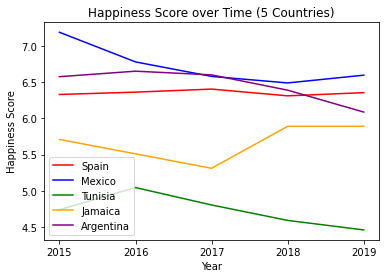

In [37]:
# Add labels to X and Y axes :: Add title
plt.title("Happiness Score over Time (5 Countries)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

# Plot the charts and apply some styling
country_1, = plt.plot(year, country_1_info, color="red", label= country_1_name)
country_2, = plt.plot(year, country_2_info, color="blue", label= country_2_name)
country_3, = plt.plot(year, country_3_info, color="green", label= country_3_name)
country_4, = plt.plot(year, country_4_info, color="orange", label= country_4_name)
country_5, = plt.plot(year, country_5_info, color= "purple", label= country_5_name)

# Create a legend for the chart
plt.legend(handles=[country_1, country_2, country_3, country_4, country_5], loc="best")